<a href="https://colab.research.google.com/github/Rekkice/ADA-Informes/blob/main/Informe12_BellmanFord.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema del camino más corto
Entrada: Grafo dirigido sin ciclos negativos y nodo inicial.

Salida: Distancia más corta para cada nodo.

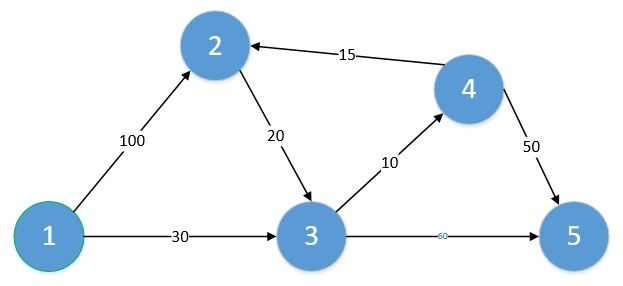

El problema del camino más corto consiste en encontrar un camino entre dos nodos en un grafo con tal de que se minimice la suma de los arcos. Generalmente, los algoritmos que resuelven este problema se usan para encontrar direcciones entre ubicaciones físicas, como por ejemplo mapas. También se usa en redes para encontrar el camino con menor demora.

# 2.1 Descripción del algoritmo

## Algoritmo de Bellman-Ford

Se inicializa la lista de subproblemas, y luego se utiliza la siguiente función de recurrencia para resolver los subproblemas de manera bottom-up:

$L_{i,v} =
\min \left\{
 \begin{array}{cc}
 L_{i-1,v} & \text{(case 1)} \\
 \min\limits_{(w,v)\in E} \{L_{i-1,w}+l_{wv}\} & \text{(case 2)}
    	\end{array}
\right\}$

Donde $L_{i,v}$ es el largo mínimo del camino hasta $v$ y con $i - 1$ arcos o menos.

## Algoritmo de Dijkstra

Se itera sobre cada nodo. En cada iteración, se agrega el arco que minimice la suma de la distancia recorrida y la distancia del arco. Luego, se agrega la distancia mínima recorrida para llegar al nodo.

# 2.2 Código

In [3]:
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

class Nodo:
    def __init__(self, idx, grafo):
        self.idx = idx
        self.arcos = list(filter(lambda x: x[0] == idx, grafo))
        self.valor = float("inf")
        self.visitado = False

def inicializarGrafo(grafo): # recibe grafo del generador de instancias, retorna mapa de objetos Nodo
    nodos = {}
    for arco in grafo:
        if arco[0] not in nodos:
            nodos[arco[0]] = Nodo(arco[0], grafo)
        if arco[1] not in nodos:
            nodos[arco[1]] = Nodo(arco[1], grafo)
    return nodos

def visualizarGrafo(grafo):
    graph = nx.DiGraph()
    for nodo in grafo.values():
        graph.add_node(nodo.idx, valor=nodo.valor)
        for arco in nodo.arcos:
            graph.add_edge(arco[0], arco[1], weight=arco[2])

    pos = graphviz_layout(graph)
    nx.draw_networkx(graph, pos, node_size=900, verticalalignment="bottom")

    labels = nx.get_edge_attributes(graph,'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)

    distLabels = nx.get_node_attributes(graph, "valor")
    nx.draw_networkx_labels(graph, pos, distLabels, verticalalignment="top", font_color = "yellow")

In [4]:
def bellmanFord(grafo, nodoInicial, visualize = False, verbose = False):
    if verbose: print("inicializando grafo")

    grafo = inicializarGrafo(grafo)
    grafo[nodoInicial].valor = 0

    if verbose: print(); print("comienzo de iteraciones")
    for numIter in range(len(grafo) - 1):
        if verbose: print(f"iteración n° {numIter + 1}")
        for nodo in grafo.values():
            for arco in nodo.arcos:
                if nodo.valor == float("inf"): break
                dist = nodo.valor + arco[2]
                if dist < grafo[arco[1]].valor:
                    if verbose: print(f"la distancia encontrada del nodo {grafo[arco[1]].idx} es menor a almacenada ({dist} < {grafo[arco[1]].valor}), se actualiza")
                    grafo[arco[1]].valor = dist
        if verbose: print()
    
    if visualize: visualizarGrafo(grafo)

    # revisa si hay ciclos negativos
    for nodo in grafo.values():
        for arco in nodo.arcos:
            if nodo.valor == float("inf"): break
            dist = nodo.valor + arco[2]
            if dist < grafo[arco[1]].valor:
                print("El grafo contiene un ciclo negativo")
                return None

    if verbose:
        print("el grafo no contiene ciclos negativos")
        print(); print("resultado")
        for nodo in grafo.values():
            print(f"idx = {nodo.idx}, valor = {nodo.valor}")

    return grafo

In [5]:
def dijkstra(arcos, nodoInicial, visualize = False, verbose = False):
    if verbose: print("inicializando grafo")
    grafo = inicializarGrafo(arcos)
    grafo[nodoInicial].valor = 0
    grafo[nodoInicial].visitado = True

    nodo = grafo[nodoInicial]
    auxArcos = nodo.arcos.copy()

    while (auxArcos):
        if verbose: print(f"arcos en la lista = {auxArcos}")
        arcoMin = min(auxArcos, key = lambda t: t[2])
        auxArcos.remove(arcoMin)
        if verbose: print(f"el arco mínimo es ({arcoMin[0]} -> {arcoMin[1]})")

        nodo = grafo[arcoMin[1]]
        if nodo.visitado: 
            if verbose: print(f"el nodo {nodo.idx} ya fue visitado, continuando con la siguiente iteración"); print()
            continue
        nodo.visitado = True
        if verbose: print(f"se visita el nodo {nodo.idx}")

        distancia = arcoMin[2]
        nodo.valor = distancia

        if verbose: print(f"agregando arcos del nodo {nodo.idx} a la lista auxiliar: ")
        for arco in nodo.arcos:
            auxArcos.append((arco[0], arco[1], arco[2] + distancia)) # agrega cada arco a la lista auxiliar, considerando la distancia
            if verbose: print(f"(arco {arco[0]} -> {arco[1]} con distancia {arco[2] + distancia})", end=" ")
        if verbose: print("\n")
    if verbose: print(); print("resultado")
    if visualize: visualizarGrafo(grafo)
    return grafo

# 2.3 Ejecución paso a paso y visualización

inicializando grafo

comienzo de iteraciones
iteración n° 1
la distancia encontrada del nodo 3 es menor a almacenada (30 < inf), se actualiza
la distancia encontrada del nodo 2 es menor a almacenada (100 < inf), se actualiza
la distancia encontrada del nodo 4 es menor a almacenada (40 < inf), se actualiza
la distancia encontrada del nodo 5 es menor a almacenada (90 < inf), se actualiza

iteración n° 2
la distancia encontrada del nodo 2 es menor a almacenada (55 < 100), se actualiza

iteración n° 3

iteración n° 4

el grafo no contiene ciclos negativos

resultado
idx = 4, valor = 40
idx = 5, valor = 90
idx = 1, valor = 0
idx = 3, valor = 30
idx = 2, valor = 55


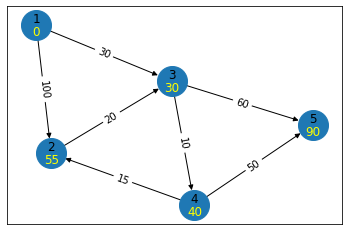

In [6]:
grafo = []
grafo.append((4, 5, 50))
grafo.append((1, 3, 30))
grafo.append((3, 4, 10))
grafo.append((1, 2, 100))
grafo.append((3, 5, 60))
grafo.append((4, 2, 15))
grafo.append((2, 3, 20))

nodos = bellmanFord(grafo, 1, True, True)

inicializando grafo
arcos en la lista = [(1, 3, 30), (1, 2, 100)]
el arco mínimo es (1 -> 3)
se visita el nodo 3
agregando arcos del nodo 3 a la lista auxiliar: 
(arco 3 -> 4 con distancia 40) (arco 3 -> 5 con distancia 90) 

arcos en la lista = [(1, 2, 100), (3, 4, 40), (3, 5, 90)]
el arco mínimo es (3 -> 4)
se visita el nodo 4
agregando arcos del nodo 4 a la lista auxiliar: 
(arco 4 -> 5 con distancia 90) (arco 4 -> 2 con distancia 55) 

arcos en la lista = [(1, 2, 100), (3, 5, 90), (4, 5, 90), (4, 2, 55)]
el arco mínimo es (4 -> 2)
se visita el nodo 2
agregando arcos del nodo 2 a la lista auxiliar: 
(arco 2 -> 3 con distancia 75) 

arcos en la lista = [(1, 2, 100), (3, 5, 90), (4, 5, 90), (2, 3, 75)]
el arco mínimo es (2 -> 3)
el nodo 3 ya fue visitado, continuando con la siguiente iteración

arcos en la lista = [(1, 2, 100), (3, 5, 90), (4, 5, 90)]
el arco mínimo es (3 -> 5)
se visita el nodo 5
agregando arcos del nodo 5 a la lista auxiliar: 


arcos en la lista = [(1, 2, 100), (4,

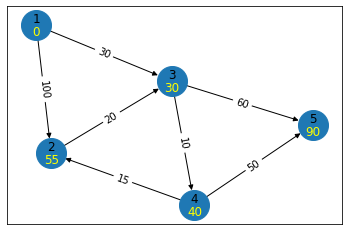

In [7]:
resultado = dijkstra(grafo, 1, True, True)

# Tiempo de ejecución

##3.1 Algoritmo Bellman-Ford
El algoritmo de Bellman-Ford tiene los siguientes tiempos de ejecuciones para los distintos casos:

*Peor Caso*: En este caso el algoritmo toma una complejidad temporal de $O(n^3)$, esto se produce cuando en la primera iteración ya se calculó el camino más corto pero el algoritmo no se detiene y sigue con el analisis, lo que significa que la complejidad completa es de:

$O(E*V) = O(V^2) * O(V)$

donde $O(V^2)$ viene siendo de el algoritmo habiendo calculado en las primeras iteraciones el camino más corto pero continua con las iteraciones.

*Caso Promedio*: El caso promedio viene dado por $O(E*V)$, osea la cantidad de nodos por la cantidad de vertices. Este caso nace de arreglar el problema que mantiene el peor caso, donde este luego de calcular el camino más corto este sigue iterando, en el caso promedio se verifica si se estan realizando cambios, en caso de que no se realicen cambios el algoritmo entiende que no existe un mejor camino más corto, por lo que termina con las iteraciones.

*Mejor Caso*: El mejor caso viene dado por $O(E)$, esto sucede cuando los nodos toman un camino lineal, es decir cada nodo tiene solo un arco.

*Complejidad Espacial*: $O(V)$, siendo esto la cantidad de nodos.
##3.2 Algoritmo de Dijkstra

El algoritmo Dijkstra presenta una complejidad espacial de $O(V^2)$, esto se debe a que para visitar cada nodo y procesarlo ambos de estos procesos es de $O(V)$, por lo que finalmente tendriamos que:

$O(V)*O(V) = O(V^2)$

Al tener que visitar y procesar estos "v" nodos terminamos teniendo que la complejidad de este algoritmo es de $O(V^2)$.

*Complejidad Espacial*: $O(V^2)$, esto se debe que el algoritmo de Dijkstra utiliza una matriz para ir almacenando los datos.

#4. Correctitud

Si el algoritmo de Bellman-Ford recibe un grafo sin ciclos negativos este calcula correctamente su camino más corto.

Esto puede ser demostrado mediante inducción.

Caso Base: si k = 0 tenemos que $dist_{k}$ = 0 para V = S, esto es debido que el camino de un nodo a sí mismo es de 0.

Hipótesis Inductiva: Despues de cada iteración "i", para cada nodo "v" se tiene que $dist(s,v)$ es el camino más corto.

Paso Inductivo: Supongamos que la hipótesis se mantiene para "i+1"
Sea u un nodo de v, asumiremos que existe una ruta más corta entre s y u, sea u el nodo anterior a v en esta ruta.

Por hipótesis inductiva, sabemos que $dist(u,i)$ es la distancia más corta entre el nodo raíz s y el nodo u. En la iteración i+1, nos aseguramos que se cumple $dist(v,i+1) =< dist(u,i) + w(u,v)$ por el paso de reajuste del algoritmo, y tenemos también que $dist(v,i+1)$ es mayor o igual al largo del camino que utiliza al meno i+1. Por lo tanto, $dist(v,i+1)$ es el largo del camino más corto entre s y v utilizando máximo i+1 arcos.

Después de n-1 iteraciones, para cada nodo v, la $dist(v,n-1)$ es el largo del camino más corto desde el nodo raíz hasta el nodo v utilizando como máximo n-1 arcos.

# 5. Experimentos
En el siguiente experimento se calculara la media del tiempo de ejecución de 25 instancias distintas para cada $n$ entre 5 y 50.

In [19]:
#@title Generador de instancias
import random

def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(0, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(0, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

tiempo en 10: 0.002536431919888855
tiempo en 20: 0.006823262119978608
tiempo en 30: 0.013952115759966546
tiempo en 40: 0.022578463799982275
tiempo en 50: 0.0337837164800294


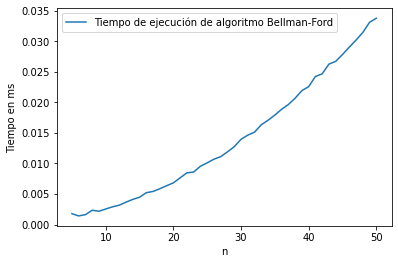

In [29]:
#@title Código gráfico
import matplotlib.pyplot as plt
import random
from timeit import repeat

x = []
y1 = []

for n in range(5, 51):
  t1 = repeat(setup="""
from __main__ import bellmanFord
from __main__ import instance_generator
""", stmt=f"""
grafo, nodoInicial = instance_generator({n})
bellmanFord(grafo, nodoInicial)
""", repeat = 25, number = 10)

  media = sum(t1) / len(t1)

  x.append(n)
  y1.append(media)
  if n % 10 == 0: print(f"tiempo en {n}: {media}")

plt.plot(x,y1)

plt.legend(["Tiempo de ejecución de algoritmo Bellman-Ford"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

## Análisis
Se observa que el tiempo de ejecución del algoritmo es exponencial. Esto se puede deber a que con el generador de instancias que se usó genera $n$ vertices y un número aleatorio entre 0 y $n*2$ de nodos. La complejidad temporal de Bellman-Ford es $O(E*V)$, por lo tanto, mientras más cerca el número de nodos esté del número de vertices, más cerca estará de tener complejidad $O(N^2)$.

## Comparación entre Bellman-Ford y Dijkstra
El siguiente experimento compara el tiempo de ejecución entre el algoritmo Bellman-Ford y Dijkstra.

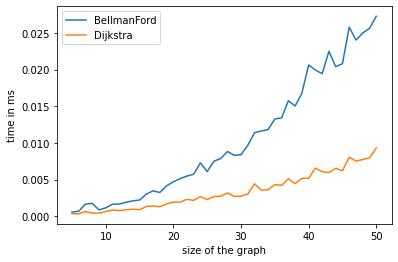

In [35]:
x=[]; y=[]; y1=[]

for n in range(5,51):

  grafo,src = instance_generator(n)

  #la función repeat está ejecutando 10 veces al algoritmo bellmanFord y retorna el mejor tiempo obtenido para cada ejecucion.
  t = repeat(setup="from __main__ import bellmanFord", stmt=f"bellmanFord({grafo},{src})", repeat=1, number=10)

  x.append(n)
  y.append(t)

  #la función repeat está ejecutando 10 veces al algoritmo Dijkstra y retorna el mejor tiempo obtenido para cada ejecucion.
  t = repeat(setup="from __main__ import dijkstra", stmt=f"dijkstra({grafo},{src})", repeat=1, number=10)

  y1.append(t)

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["BellmanFord","Dijkstra"])

plt.xlabel('size of the graph')
plt.ylabel('time in ms')
plt.show()

## Análisis
Se puede observar que el tiempo de ejecución del algoritmo Bellman-Ford crece mucho más rápido para tamaños de entrada mayores. Esto se podría debe a que el peor caso de Bellman-Ford es $O(V^3)$ mientras que para Dijkstra es sólo $O(V^2)$.